# ABCD Method for estimating the Z-QCD correction factors.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
print("Adding the following path to sys.path:", os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd())) # Needed to load all the modules in the parent directory
from histogramHelpers import biner,ratioDataMinusBG
from AnalysisCommons.Run import INFO, WARNING, ERROR, DEBUG, Logger
Logger.LOGLEVEL = 3 # Set the log level

Adding the following path to sys.path: /Users/user/Documents/HEP/VBF-Analysis


## Test if EWjj model makes a difference in CRs

INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]


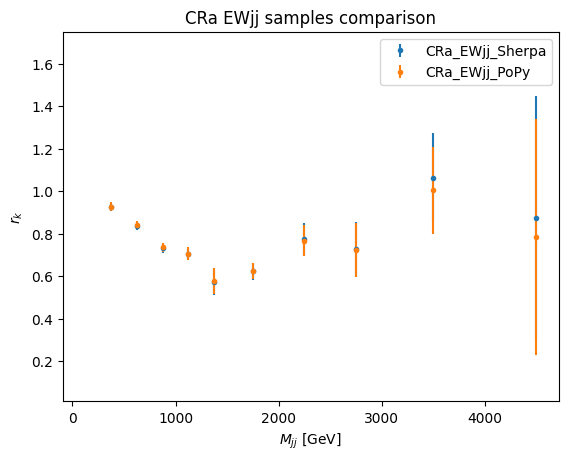

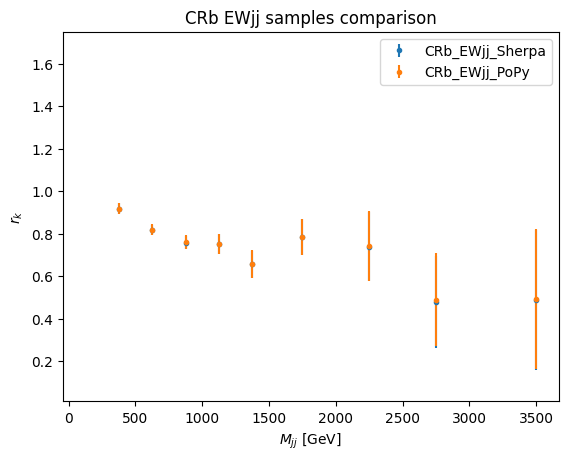

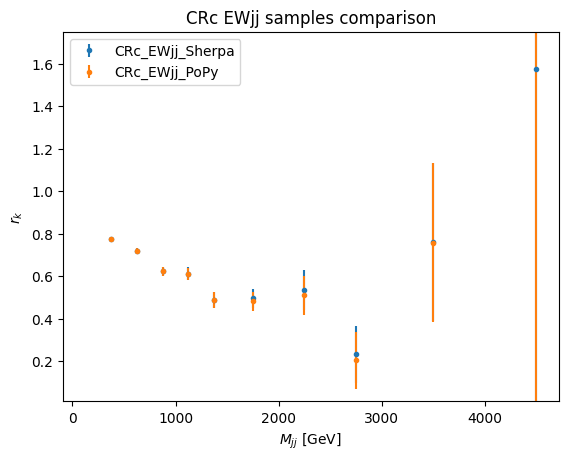

In [2]:
root_path = '/Users/user/Documents/HEP/VBF-Analysis/VBFAnalysisPlots/Zll/NewZpeak/'
path_CRa = root_path+"CRa"
path_CRb = root_path+"CRb"
path_CRc = root_path+"CRc"
signal = "Zll_MG"
QCD_sample_type = signal.replace('Zll_','')

histo={
"mass_jj":[[1500,3000],[250,500,1000],250],
}

scaleFactors = {"Signal_Sherpa":1.0,"Signal_PoPy":1.0}

# Sherpa for EWjj
EWjjSample = "Signal_Sherpa"
bg_samples = [EWjjSample,"VV","VV_EWK","Wjets","ttbar","singletop"]
CRa_axis,CRa_y,CRa_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb_axis,CRb_y,CRb_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc_axis,CRc_y,CRc_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)

# Powheg+Pythia for EWjj + scaling
EWjjSample = "Signal_PoPy"
bg_samples = [EWjjSample,"VV","VV_EWK","Wjets","ttbar","singletop"]
CRa2_axis,CRa2_y,CRa2_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb2_axis,CRb2_y,CRb2_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc2_axis,CRc2_y,CRc2_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)


# Plot CRa
plt.errorbar(CRa_axis,CRa_y,yerr=CRa_error,fmt='.')
plt.errorbar(CRa2_axis,CRa2_y,yerr=CRa2_error,fmt='.')
plt.legend(['CRa_EWjj_Sherpa','CRa_EWjj_PoPy'])
plt.xlabel(r'$M_{jj}$ [GeV]')
plt.ylabel(r"$r_k$")
plt.title('CRa EWjj samples comparison')
plt.ylim(0.01,1.75)
plt.show()
# Plot CRb
plt.errorbar(CRb_axis,CRb_y,yerr=CRb_error,fmt='.')
plt.errorbar(CRb2_axis,CRb2_y,yerr=CRb2_error,fmt='.')
plt.legend(['CRb_EWjj_Sherpa','CRb_EWjj_PoPy'])
plt.xlabel(r'$M_{jj}$ [GeV]')
plt.ylabel(r"$r_k$")
plt.title('CRb EWjj samples comparison')
plt.ylim(0.01,1.75)
plt.show()
# Plot CRc
plt.errorbar(CRc_axis,CRc_y,yerr=CRc_error,fmt='.')
plt.errorbar(CRc2_axis,CRc2_y,yerr=CRc2_error,fmt='.')
plt.legend(['CRc_EWjj_Sherpa','CRc_EWjj_PoPy'])
plt.xlabel(r'$M_{jj}$ [GeV]')
plt.ylabel(r"$r_k$")
plt.title('CRc EWjj samples comparison')
plt.ylim(0.01,1.75)
plt.show()

## Using mid point in the bins for the fit

In [3]:
print('X axis being used for CRa:', CRa_axis[1:], 'GeV')
print('X axis being used for CRb:', CRb_axis[1:], 'GeV')
print('X axis being used for CRc:', CRc_axis[1:], 'GeV')

X axis being used for CRa: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV
X axis being used for CRb: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500.] GeV
X axis being used for CRc: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV


## Fits in the CRs

In [4]:
from MjjFit import linear_model, parabolic_model, exponential_model, mjj_fit_experiment, FitExperimentContainer

experiments = FitExperimentContainer()

# EWjj Sherpa | QCDjj X - Linear and Parabolic fits
mjj_fit_experiment(linear_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name=f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_linear", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name=f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
mjj_fit_experiment(exponential_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name=f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_exponential", experiments_container=experiments)

mjj_fit_experiment(linear_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name=f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_linear", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name=f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
mjj_fit_experiment(exponential_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name=f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_exponential", experiments_container=experiments)

mjj_fit_experiment(linear_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name=f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_linear", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name=f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
mjj_fit_experiment(exponential_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name=f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_exponential", experiments_container=experiments)

# EWjj PoPy | QCDjj X - Linear and Parabolic fits
mjj_fit_experiment(parabolic_model, CRa2_axis[1:], CRa2_y[1:], CRa2_error[1:], experiment_name=f"CRa_EWjjPoPy_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRb2_axis[1:], CRb2_y[1:], CRb2_error[1:], experiment_name=f"CRb_EWjjPoPy_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRc2_axis[1:], CRc2_y[1:], CRc2_error[1:], experiment_name=f"CRc_EWjjPoPy_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)

INFO: Adding new experiment CRa_EWjjSherpa_QCDjjMG_linear. 
INFO: Adding new experiment CRa_EWjjSherpa_QCDjjMG_parabolic. 
INFO: Adding new experiment CRa_EWjjSherpa_QCDjjMG_exponential. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjMG_linear. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjMG_parabolic. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjMG_exponential. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjMG_linear. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjMG_parabolic. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjMG_exponential. 
INFO: Adding new experiment CRa_EWjjPoPy_QCDjjMG_parabolic. 
INFO: Adding new experiment CRb_EWjjPoPy_QCDjjMG_parabolic. 
INFO: Adding new experiment CRc_EWjjPoPy_QCDjjMG_parabolic. 


(array([ 5.91393931e-08, -3.50644196e-04,  9.02276012e-01]),
 array([[ 9.26122304e-16, -1.96228252e-12,  7.71204118e-10],
        [-1.96228252e-12,  4.65397670e-09, -1.97189107e-06],
        [ 7.71204118e-10, -1.97189107e-06,  9.44796580e-04]]))

INFO: Displaying the figure without saving. 


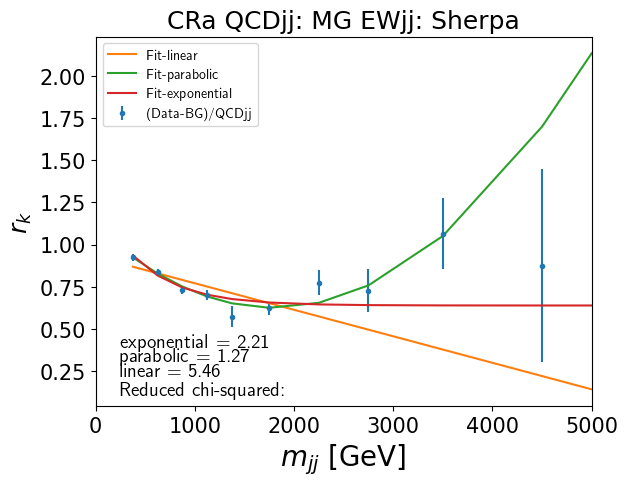

In [5]:
from MjjFit import display_fit_experiments
display_fit_experiments(experiments, "CRa", [f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             ])

INFO: Displaying the figure without saving. 


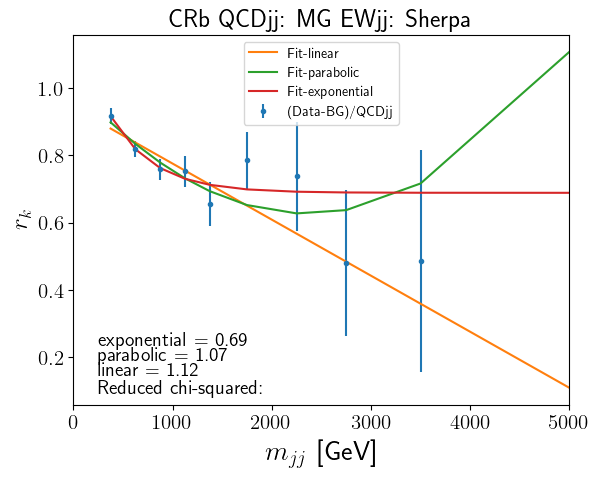

In [6]:
display_fit_experiments(experiments, "CRb", [f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             ])

INFO: Displaying the figure without saving. 


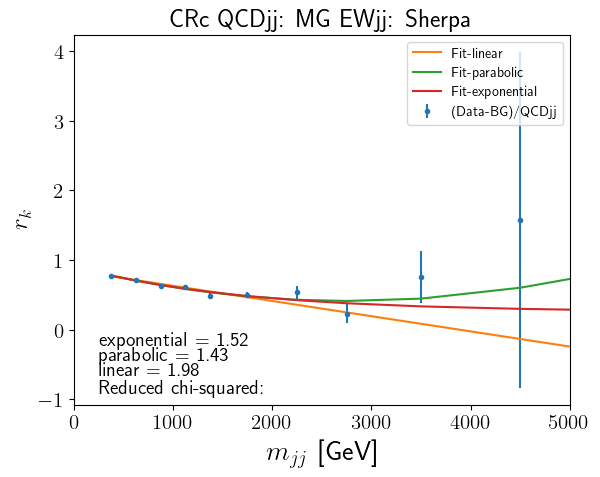

In [7]:
display_fit_experiments(experiments, "CRc", [f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             ])

## Add the parabolic cutoff models for the CRs

In [8]:
from MjjFit import FitExperiment, parabolic_cutoff_model
import numpy as np

parabolic_experiment = experiments.get_experiment(f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(parabolic_experiment.make_single_prediction(2250))
experiment = FitExperiment(
    name = f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2250,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

parabolic_experiment = experiments.get_experiment(f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(parabolic_experiment.make_single_prediction(2250))
experiment = FitExperiment(
    name = f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2250,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

parabolic_experiment = experiments.get_experiment(f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(parabolic_experiment.make_single_prediction(2250))
experiment = FitExperiment(
    name = f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2250,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

0.66+/-0.04
0.63+/-0.07
0.43+/-0.05


INFO: Saving the figure to results/CRa_EWjjSherpa_QCDjjMG.pdf 


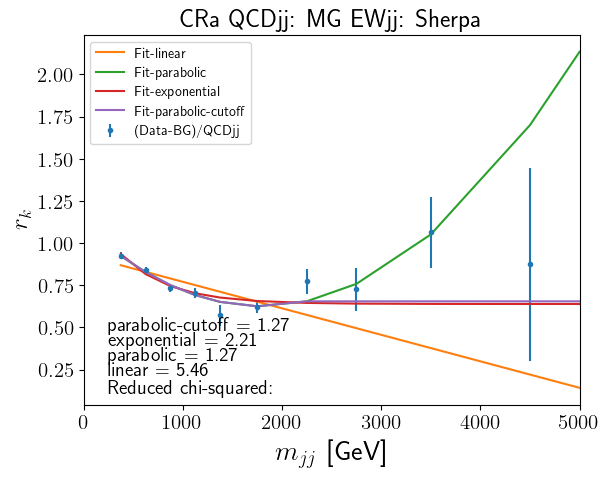

In [9]:
display_fit_experiments(experiments, "CRa", [f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff"],
                                             save = True, save_name = f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}")

INFO: Saving the figure to results/CRb_EWjjSherpa_QCDjjMG.pdf 


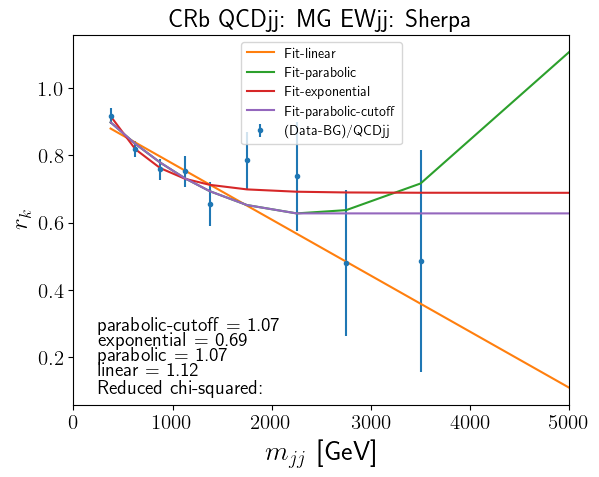

In [10]:
display_fit_experiments(experiments, "CRb", [f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff"],
                                             save = True, save_name = f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}")

INFO: Saving the figure to results/CRc_EWjjSherpa_QCDjjMG.pdf 


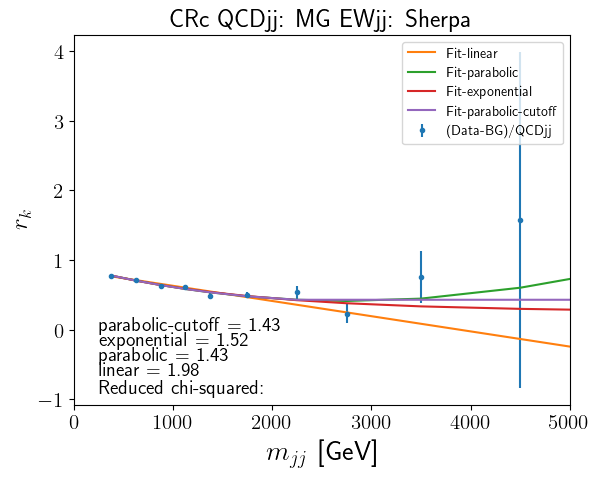

In [11]:
display_fit_experiments(experiments, "CRc", [f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff"],
                                             save = True, save_name = f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}")

In [12]:
from MjjFit import predict_SR_from_experiments
x = parabolic_experiment.x
x = np.append(250, x)
SR_pred_from_parabolicCutoff_y, SR_pred_from_parabolicCutoff_error = predict_SR_from_experiments(experiments, experiment_type = f"EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff", x_axis = x)
SR_pred_from_parabolic_y, SR_pred_from_parabolic_error = predict_SR_from_experiments(experiments, experiment_type = f"EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", x_axis = x)
SR_pred_from_exponential_y, SR_pred_from_exponential_error = predict_SR_from_experiments(experiments, experiment_type = f"EWjjSherpa_QCDjj{QCD_sample_type}_exponential", x_axis = x)

print(x)


[ 250.  375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.]


INFO: Using point-by-point prediction mode. These are the axis of the CRs:  
INFO: CRa: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] 
INFO: CRb: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500.] 
INFO: CRc: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] 
INFO: Found 9 valid elements in the CRs. Using them for the ABCD extrapolation 


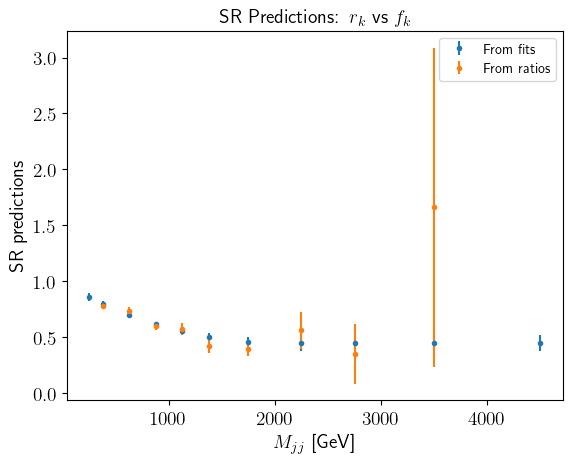

In [13]:
rk, rk_error = predict_SR_from_experiments(experiments, experiment_type = f"EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff", prediction_mode = 'point-by-point')
plt.errorbar(x,SR_pred_from_parabolicCutoff_y,yerr=SR_pred_from_parabolicCutoff_error,fmt='.', label='From fits')
plt.errorbar(x[1:len(rk)+1],rk,yerr=rk_error,fmt='.', label='From ratios')
plt.legend()
plt.xlabel(r'$M_{jj}$ [GeV]', fontsize=14)
plt.title(r"SR Predictions: $r_k$ vs $f_k$", fontsize=14)
plt.ylabel(r"SR predictions", fontsize=14)
# Make font of all things larger
plt.tick_params(labelsize=14)
plt.savefig(f"results/SR_predictions_rk_vs_fk_EWjjSherpa_QCDjj{QCD_sample_type}.pdf")

In [14]:

SR_fit_from_parabolicCutoff, SR_cov_from_parabolicCutoff = mjj_fit_experiment(parabolic_model, x, SR_pred_from_parabolicCutoff_y, SR_pred_from_parabolicCutoff_error, experiment_name=f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
SR2_fit_from_parabolic, SR2_cov_from_parabolic = mjj_fit_experiment(parabolic_model, x, SR_pred_from_parabolic_y, SR_pred_from_parabolic_error, experiment_name=f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
SR3_fit_from_exponential, SR3_cov_from_exponential = mjj_fit_experiment(exponential_model, x, SR_pred_from_exponential_y, SR_pred_from_exponential_error, experiment_name=f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_exponential", experiments_container=experiments)

parabolic_experiment = experiments.get_experiment(f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(parabolic_experiment.make_single_prediction(2250))
experiment = FitExperiment(
    name = f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2250,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

INFO: Adding new experiment SRFromCutoffCRs_EWjjSherpa_QCDjjMG_parabolic. 
INFO: Adding new experiment SR_EWjjSherpa_QCDjjMG_parabolic. 
INFO: Adding new experiment SR_EWjjSherpa_QCDjjMG_exponential. 
0.388+/-0.020


INFO: Saving the figure to results/SR_EWjjSherpa_QCDjjMG.pdf 


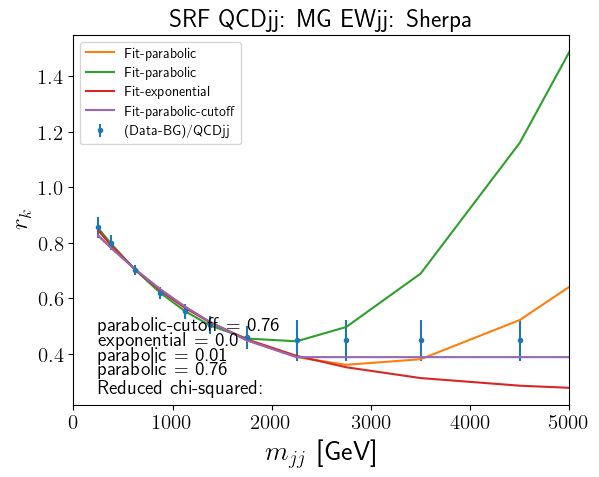

In [15]:
display_fit_experiments(experiments, "SR",
                        [f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                         f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                         f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                         f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff"],
                         save=True, save_name=f"SR_EWjjSherpa_QCDjj{QCD_sample_type}")

In [16]:
experiment = experiments.get_experiment(f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic predictions:")
print("250 GeV:", experiment.make_single_prediction(250), " 5000 GeV:", experiment.make_single_prediction(5000))
print("\n")

experiment = experiments.get_experiment(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic predictions:")
print("250 GeV:", experiment.make_single_prediction(250), " 5000 GeV:", experiment.make_single_prediction(5000))
print("\n")

experiment = experiments.get_experiment(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_exponential")
print(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_exponential predictions:")
print("250 GeV:", experiment.make_single_prediction(250), " 5000 GeV:", experiment.make_single_prediction(5000))
print("\n")

experiment = experiments.get_experiment(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff")
print(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff predictions:")
print("250 GeV:", experiment.make_single_prediction(250), " 5000 GeV:", experiment.make_single_prediction(5000))
print("\n")

SRFromCutoffCRs_EWjjSherpa_QCDjjMG_parabolic predictions:
250 GeV: 0.826+/-0.016  5000 GeV: 0.64+/-0.08


SR_EWjjSherpa_QCDjjMG_parabolic predictions:
250 GeV: 0.8533+/-0.0018  5000 GeV: 1.489+/-0.033


SR_EWjjSherpa_QCDjjMG_exponential predictions:
250 GeV: 0.8450+/-0.0009  5000 GeV: 0.2777+/-0.0024


SR_EWjjSherpa_QCDjjMG_parabolic-cutoff predictions:
250 GeV: 0.826+/-0.016  5000 GeV: 0.388+/-0.020




# Write experiments to file

In [17]:
experiments.write_experiments_to_file(f'Fits_Zll_{QCD_sample_type}.txt')

INFO: File results/Fits_Zll_MG.txt already exists. Do you want to overwrite it? (y/n) 
INFO: Experiments written to file results/Fits_Zll_MG.txt. 


# Display the SR predictions as a RDF

In [ ]:
from MjjFit import convert_fit_result_to_dataframe

# Sherpa for EWjj
print("Sherpa for EWjj")
print("Parameters ",SR3_fit)
print("Covariance Matrix",SR3_cov)
print(convert_fit_result_to_dataframe(SR3_fit,SR3_cov,['a','b','c']))
print("\n")

convert_fit_result_to_dataframe(SR3_fit,SR3_cov,['a','b','c'])